In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
energy_df = pd.read_csv("all_energy_statistics.csv")
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [3]:
# identify the types of objects in the data frame
energy_df.info()

# data is missing from the quantity footnotes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [4]:
# Find all unique countries, categories, and commodity transactions
print(energy_df.country_or_area.unique())
print(energy_df.category.unique())
print(energy_df.commodity_transaction.unique())
print(energy_df.unit.unique())
print(energy_df.quantity_footnotes.unique())

['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 "Korea, Dem.Ppl's.Rep." 'Russian Federation' 'Swaziland' 'Zimbabwe'
 'Afghanistan' 'Antigua and Barbuda' 'Azerbaijan' 'Bahamas' 'Belize'
 'Bolivia (Plur. State of

In [5]:
# find number of unique values in each column
print(f"Number of Unique Countries {energy_df.country_or_area.nunique()}")
print(f"Number of Unique Products {energy_df.category.nunique()}")
print(f"Number of Unique Transactions {energy_df.commodity_transaction.nunique()}")
print(f"Different Units of Measure {energy_df.unit.nunique()}")
print(f"Different FootNote Values {energy_df.quantity_footnotes.nunique()}")

Number of Unique Countries 243
Number of Unique Products 71
Number of Unique Transactions 2452
Different Units of Measure 6
Different FootNote Values 1


# There seems to be a wide variety of countries and types of fuels. Need to add another column that can group these into super groups such as continents/regions, product categories, and product transactions


In [6]:
# Drop FootNote Columner
energy_df = energy_df.drop(['quantity_footnotes'], axis=1)

# Rename category column to product and add empty column named product category
energy_df = energy_df.rename(columns={"category":"products"})
energy_df["product_category"] = np.nan

# Find total quantity of products exported or imported

In [40]:
product_flow = energy_df.groupby(['products', 'unit']).mean().round(2).drop(['year', 'product_category'], axis=1)
product_flow.head()

,,quantity
products,unit,
additives_and_oxygenates,"Metric tons, thousand",355.34
animal_waste,Terajoules,50930.30
anthracite,"Metric tons, thousand",534.20
aviation_gasoline,"Metric tons, thousand",18.19
bagasse,"Metric tons, thousand",3815.99


In [42]:
# reset index to plot quantity against products
product_flow = product_flow.reset_index()

In [47]:
product_flow = product_flow.sort_values(by=['quantity'], ascending=False)
product_flow.head()

,products,unit,quantity
11,brown_coal,"Metric tons, thousand",1967868.84
30,hard_coal,"Metric tons, thousand",1694778.49
41,natural_gas_including_lng,Terajoules,1343446.28
57,peat,"Metric tons, thousand",736122.47
17,conventional_crude_oil,"Metric tons, thousand",253327.06


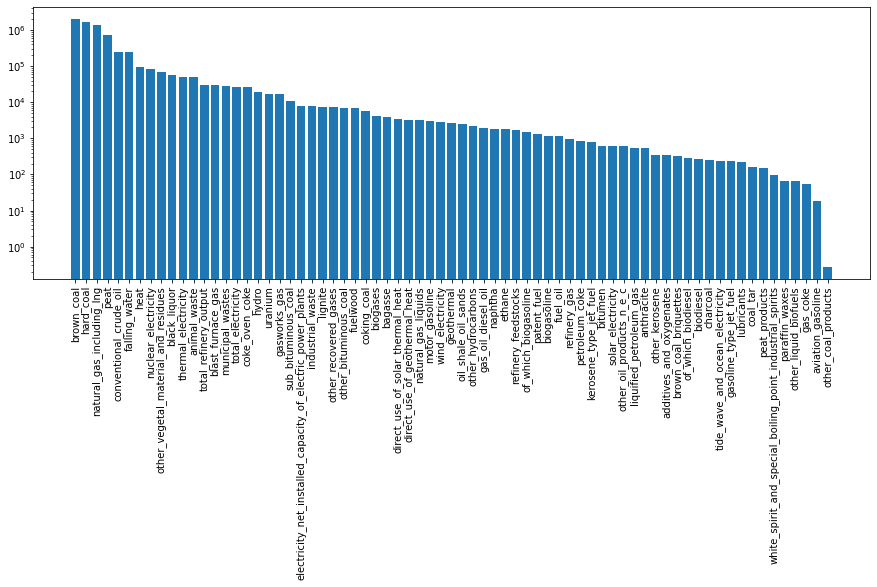

In [53]:
plt.figure(figsize=(15,5))

plt.bar(product_flow['products'], product_flow['quantity'])
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

In [ ]:
# The graph above shows how much of each product has been consumed, transformed, exported, imported, etc. from 1990 to 2014
# This is very general and does not provide much information

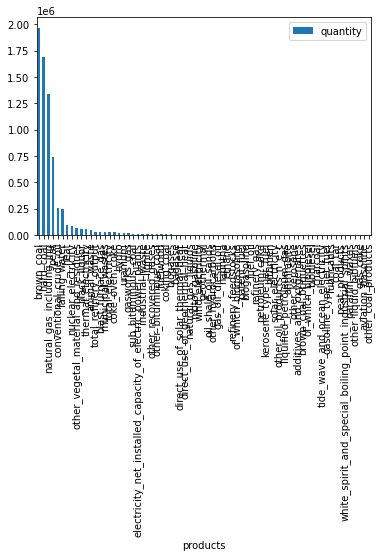

In [49]:
product_flow.plot.bar(x='products', y='quantity')

# Creating Product Categories

In [21]:
def product_categories(x):
    for product in energy_df.products:
        if x.energy_df.products == 'additives_and_oxygenates':
            print("This is an oil product")
#         return x.energy_df.fillna('Oil')

# energy_df['product_category'] = energy_df.apply(product_categories, axis=1)
        
    

In [24]:
product_categories(3)

AttributeError: 'int' object has no attribute 'energy_df'